# **Motorbike Ambulance Calls**
>Motorbike accidents and corresponded ambulance calls are highly depended on environmental and seasonal settings, like weather conditions, precipitation, day of week, season, hour of the day, etc. The data was aggregated over the course of two years, on hourly basis, and then extracted and extended with the corresponding weather and seasonal information.


## **Associated tasks**

---


**Regression**

Prediction of the hourly ambulance calls count based on the environmental and seasonal settings. Prediction model should provide monotonic in the terms of some features, if it is proved by data.

**Event and Anomaly Detection**

Define the  ambulance calls patterns with respect of special events and define the cases that might be considered as abnormal behavior.  

**Deliverables**

Full Texts Report that contains detail description of Data Analysis, Data Modelling and Patterns/Anomaly detection processes with conclusions and their explanations.
What is important here:
* See the **way you’re thinking** – what actions you’re implementing and why
* How **you code** and wrangle the data
* **Storytelling** capabilities – so we’re looking for the full-text structured report separately from the code/notebook
* **Suggestions** on the further  analytics/approaches which could be applied

## **Dataset characteristics:**

---



motorbike_ambulance_calls.csv has the following fields:

              - index: record index
              - date : date
              - season : season (1:springer, 2:summer, 3:fall, 4:winter)
              - yr : year (0: 2011, 1:2012)
              - mnth : month ( 1 to 12)
              - hr : hour (0 to 23)
              - holiday : whether day is holiday or not
              - weekday : day of the week
              - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
              -  weathersit :
                      - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
                      - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
                      - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
                      - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
              - temp : Normalized temperature in Celsius. The values are divided to 41 (max)
              - atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
              - hum: Normalized humidity. The values are divided to 100 (max)
              - windspeed: Normalized wind speed. The values are divided to 67 (max)
              - cnt: count of total ambulance calls


In [135]:
import time

import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pylab import rcParams

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

import xgboost as xgb


import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [14]:
df = pd.read_csv(
    "motorbike_ambulance_calls.csv", 
    encoding="utf-8", 
    sep=",", 
    index_col="index"
)

In [15]:
df.head()

,date,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
index,,,,,,,,,,,,,,
1,1/1/11,spring,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
2,1/1/11,spring,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
3,1/1/11,spring,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
4,1/1/11,spring,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
5,1/1/11,spring,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17379 entries, 1 to 17379
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        17379 non-null  object 
 1   season      17379 non-null  object 
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  cnt         17379 non-null  int64  
dtypes: float64(4), int64(8), object(2)
memory usage: 2.0+ MB


In [17]:
df.drop_duplicates()

,date,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
index,,,,,,,,,,,,,,
1,1/1/11,spring,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
2,1/1/11,spring,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
3,1/1/11,spring,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
4,1/1/11,spring,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
5,1/1/11,spring,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17375,12/31/12,spring,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17376,12/31/12,spring,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17377,12/31/12,spring,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90


In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000
atemp,17379.0,0.475775,0.171850,0.00,0.3333,0.4848,0.6212,1.0000
hum,17379.0,0.627229,0.192930,0.00,0.4800,0.6300,0.7800,1.0000


In [19]:
df.nunique().sort_values(ascending=False)

cnt           869
date          731
hum            89
atemp          65
temp           50
windspeed      30
hr             24
mnth           12
weekday         7
season          4
weathersit      4
yr              2
holiday         2
workingday      2
dtype: int64

In [20]:
df.isnull().sum()

date          0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

Провів попередній перегляд датасету його полів, дані якого типу наявні, чи є None значення 

In [21]:
df["date"] = pd.to_datetime(
    df["date"],
    format="%m/%d/%y"
)

df["season"] = df["date"].apply(
    lambda d: d.month % 12 // 3 + 1
)

Після того як я переглянув поле `season` я побачив що в цьому полі сезони вказані не зовсім правильно тому вирішив перевсти поле date в datetime тип для того щоб з нього можна було легко витягнути місяць і за допомогою ламбда функції визначити всі сезони відразу в потрібному мені числовому форматі тобто в категоріальну змінну

In [22]:
df_categorical = df[["season", "yr", "mnth", "hr", "holiday", "weekday", "workingday", "weathersit"]]
df_numerical = df[["temp", "atemp", "hum", "windspeed", "cnt"]]

Далі я вирішив розділити датафрейм на категоріальні та числові змінні для подальшого аналізу

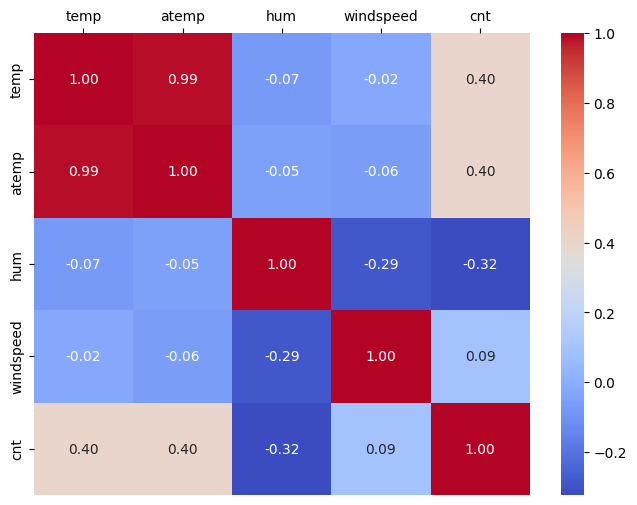

In [23]:
pearson_corr = df_numerical.corr("pearson")

fig, ax = plt.subplots(figsize=(8,6))
corr = sns.heatmap(pearson_corr, annot=True, cmap="coolwarm", fmt=".2f", ax=ax)
corr.xaxis.tick_top()


Згідно кореляційної матриці можна сказати що:
- Змінні ```temp``` та ```atemp``` є мультиколінеарними тому що мають дуже сильний звякок через це ми можемо видалити одну з них. Також вони корелюють з ```cnt``` що означає чим вища була температура тим більша була кількість дзвінків.
- Змінна ```hum``` також має негативний звязок з ```cnt``` та ```windspeed``` що означає чим менша вологість тим менше дзвінків та чим менша вологість тим менше швидкість вітру.

In [24]:
df_numerical = df_numerical.drop("atemp", axis=1)

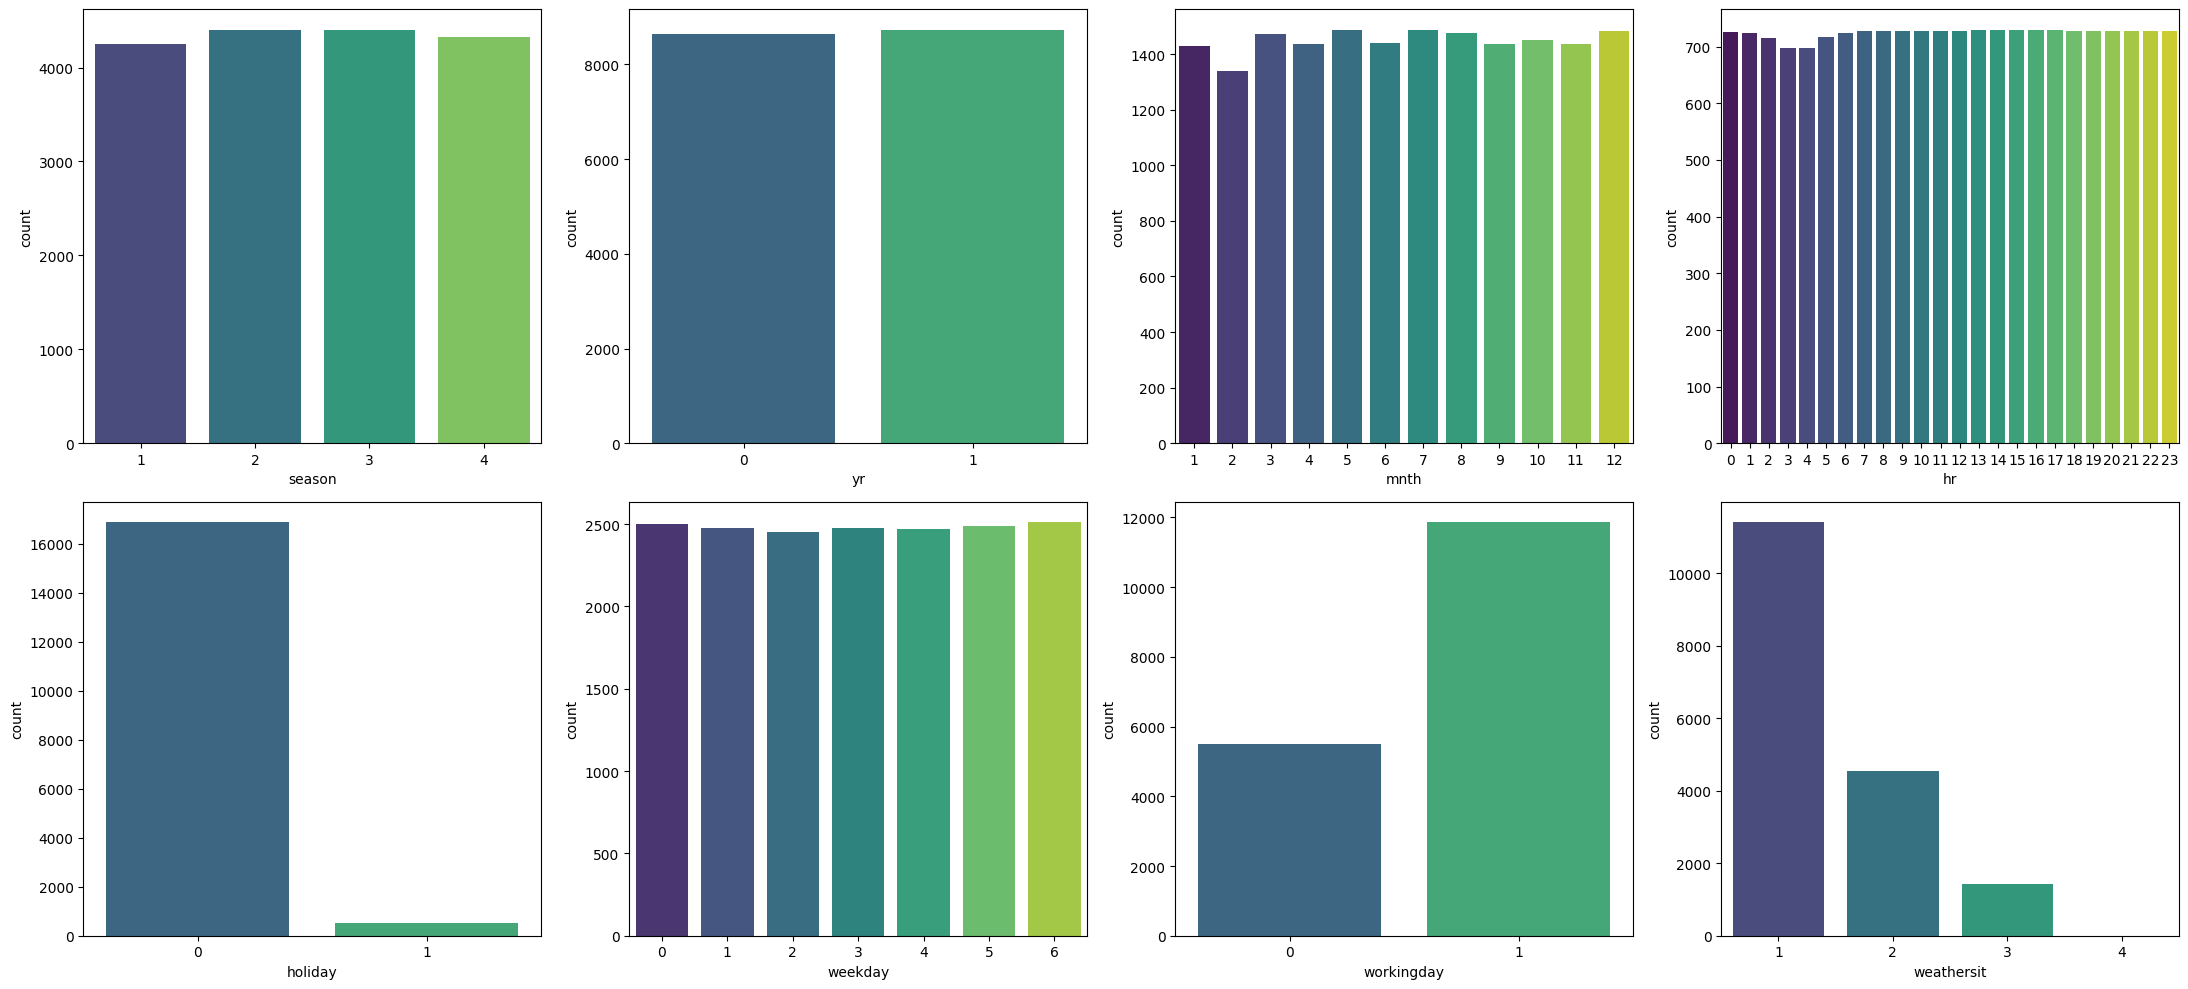

In [25]:
fig, ax = plt.subplots(2, 4, figsize=(22, 10))
for variable, subplot in zip(df_categorical, ax.flatten()):
  sns.countplot(
    df_categorical,
    x=variable,
    ax=subplot,
    palette="viridis"
  )

fig.tight_layout()

Найбільш цікаві є графіки ```holiday, workingday, weathersit``` по них ми можемо сказати що більше викликів припадало на робочі дні в які була хороша погода.

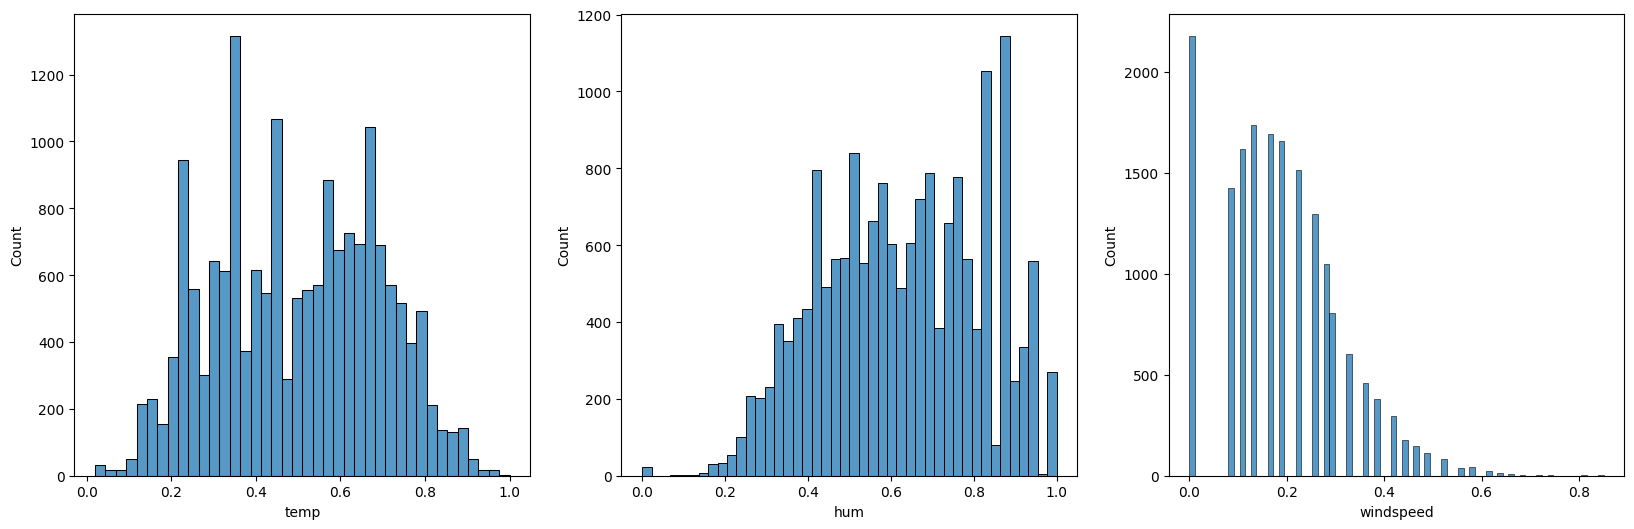

In [30]:
fig, ax = plt.subplots(1, 3, figsize=(20, 6))
numerical_without_cnt = df_numerical.drop("cnt", axis=1)
for variable, subplot in zip(numerical_without_cnt, ax.flatten()):
    sns.histplot(
        numerical_without_cnt, 
        x=variable, 
        ax=subplot,
        palette="viridis"
    )

Всі гістограми мають важкі хвости що означає доволі сутєві відхилення від середніх значень. 
- Розподіл ```temp``` є бімодальни. 
- Розподіл ```hum``` наближається до рівномірного розподілу.
- Розподіл ```windspeed``` схожий на експоненційний розподіл.

Text(0.5, 1.0, 'Skewness: 1.28, Kurtosis: 1.42')

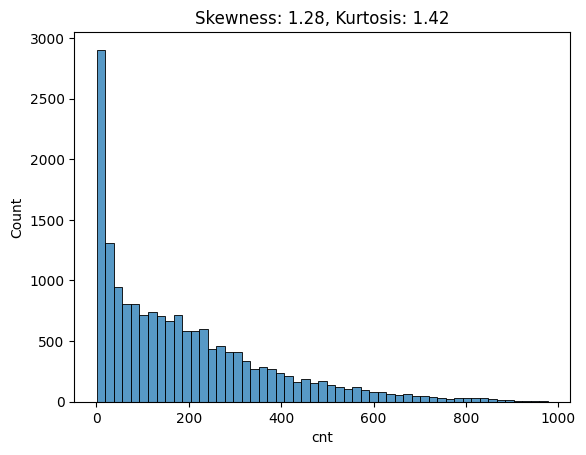

In [36]:
sns.histplot(
    df_numerical, 
    x=df_numerical["cnt"],
    palette="viridis"
).set_title(
    f"Skewness: {df['cnt'].skew():.2f}, Kurtosis: {df['cnt'].kurtosis():.2f}"
)

На гістограмі розподілу ```cnt``` можна відразу побачити асиметрію яка може повпливати на результати при навчанні також на асиметрію вказує коефіцієнт скошеності який в нас доволі високий ```1.28``` додатнє значення вказує що асиметрія схилена праворуч це означає що є більше значень які більші за середнє. Також коефіцієнт ексцесу в даному випадку дорівнює `1.42` що означає розподіл є дещо більш гостроверхим ніж нормальний розподіл.


<Axes: xlabel='cnt', ylabel='Density'>

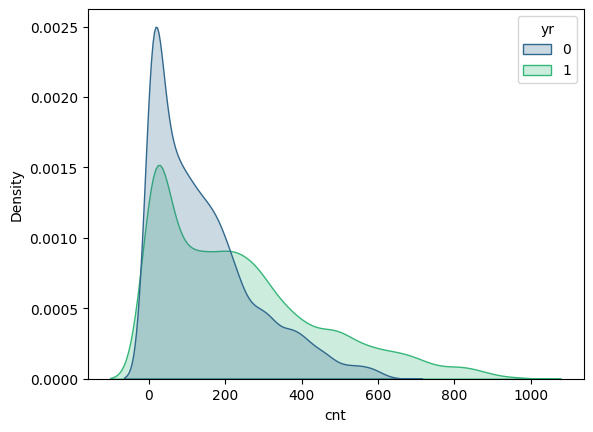

In [35]:
sns.kdeplot(
    df, 
    x="cnt", 
    hue="yr", 
    fill=True,
    palette="viridis"
)

In [39]:
df["is_night"] = df["hr"].apply(lambda x: 1 if x >= 6 and x < 22 else 0)

<Axes: xlabel='cnt', ylabel='Density'>

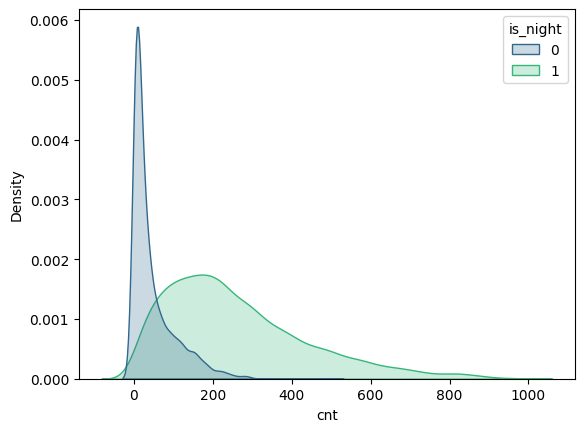

In [40]:
sns.kdeplot(
    df, 
    x="cnt", 
    hue="is_night", 
    palette="viridis", 
    fill=True
)

Добавивши нову колонку `is_night` яка вказує на те чи зараз ніч згідно графіку ми можемо зрозуміти що більшість викликів було саме вдень що логічно адже вночі більшість людей сплять.

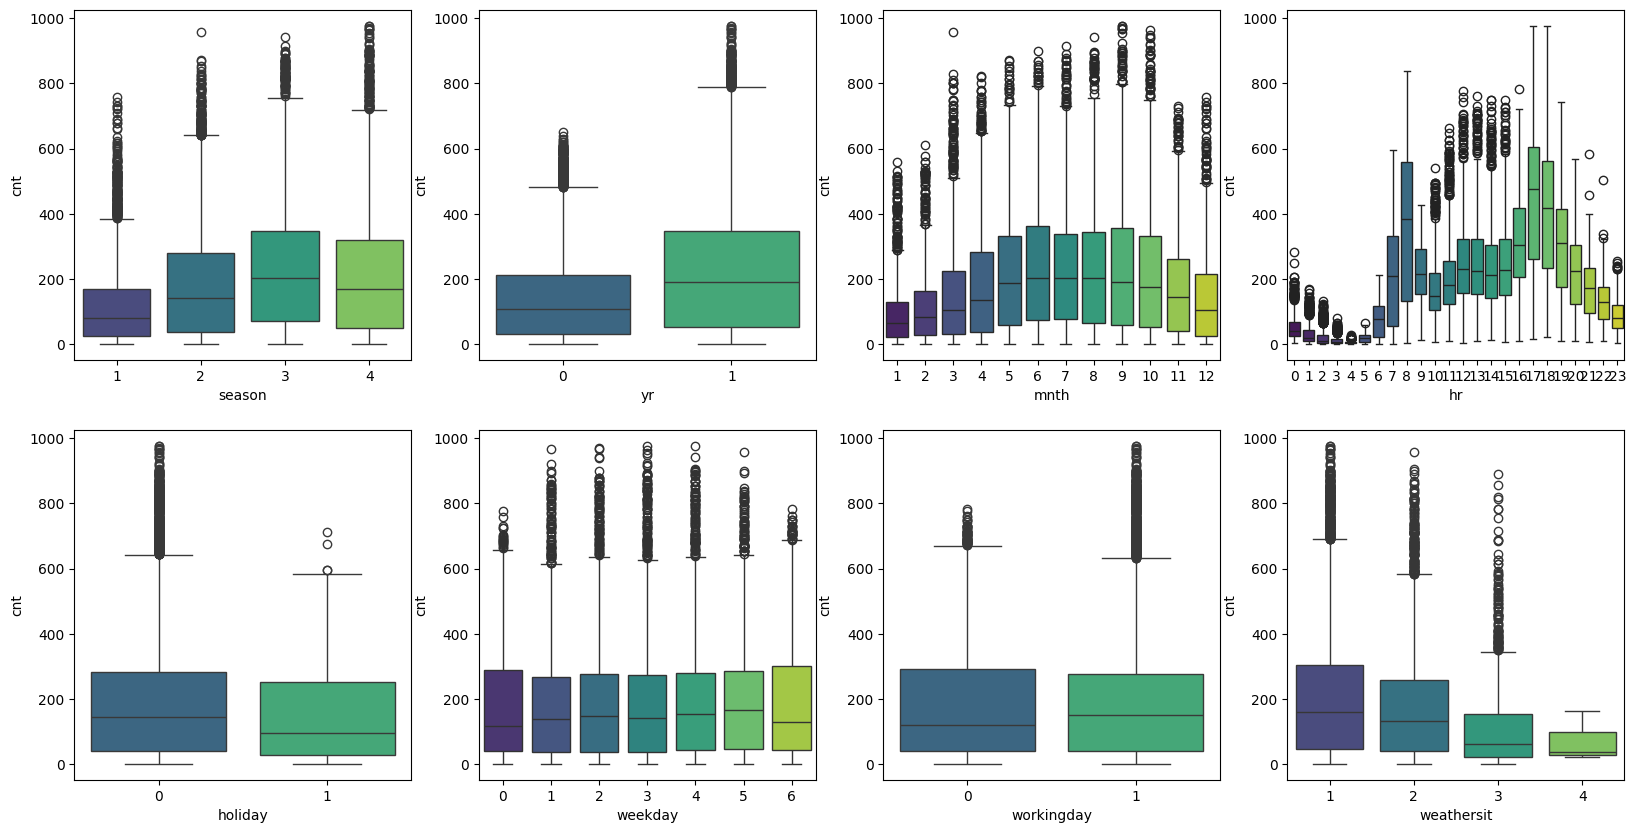

In [ ]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for var, subplot in zip(df_categorical, ax.flatten()):
  sns.boxplot(
    df,
    x=var,
    y="cnt",
    ax=subplot,
    palette="viridis"
  )

 З боксплотів також цікавим є погодинне співідношення ```hr``` в якому можна чітко відслідкувати тенденцію на спад після вечора й до ранку та пікові значення в годині 8 та 18 приблизно тоді коли люди їдуть на роботу або повертаються додому.

In [42]:
def get_dummies(df: pd.DataFrame, categories: list[str], drop: bool = True):
  dummies = [pd.get_dummies(df[c], prefix=c) for c in categories]
  
  features = pd.concat([df, *dummies], axis=1)
  if drop:
    features = features.drop(categories, axis=1)

  return features

In [60]:
features = get_dummies(
    df, 
    ["season", "mnth", "weekday", "weathersit", "hr"]
)

features = features.drop(
    ["mnth_4", "weekday_0", "weathersit_1", "hr_0", "atemp", "date"],
    axis = 1
)

In [78]:
def get_scaled_train_data(df: pd.DataFrame, target:str, test_size:float):
  X = df.drop(target, axis=1)
  y = df[target]
  
  X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=test_size, random_state=42, shuffle = True)

  scaler = StandardScaler()

  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  return X_train, X_test, y_train, y_test

In [79]:
X_train, X_test, y_train, y_test = get_scaled_train_data(features, "cnt", 0.2)

In [107]:
def train_models_and_rate(models: list[any]) -> dict[str, any]:
    result_dict = {}

    for model in models:
        start_time = time.perf_counter()

        model.fit(X_train, y_train)
        preds = model.predict(X_test)

        end_time = time.perf_counter()

        print(f"{model.__class__.__name__}:")
        print(f"Execution time: {end_time - start_time:.2f}")
        print(f"mse: {mean_squared_error(y_test, preds):.2f}")
        print(f"r2: {r2_score(y_test, preds):.2f}\n")

        result_dict[model.__class__.__name__] = preds

    return result_dict

In [127]:
xgb_regressor_model = xgb.XGBRegressor(n_estimators=100, random_state=42)

train_results = train_models_and_rate([
    LinearRegression(),
    RandomForestRegressor(random_state=42, n_estimators=100),
    xgb_regressor_model
])

LinearRegression:
Execution time: 0.06
mse: 10268.19
r2: 0.68

RandomForestRegressor:
Execution time: 7.99
mse: 2224.39
r2: 0.93

XGBRegressor:
Execution time: 0.19
mse: 2129.07
r2: 0.93



Для навчання я обрав три моделі дві з яких (`RandomForestRegressor`, `XGBRegressor`) показали доволі класні результати точності проте модель `XGBRegressor` я вважаю впоралась трішки краще та основною її перевагою є швидкість навчання яка майже в 42 рази швидше навчалась ніж `RandomForestRegressor`

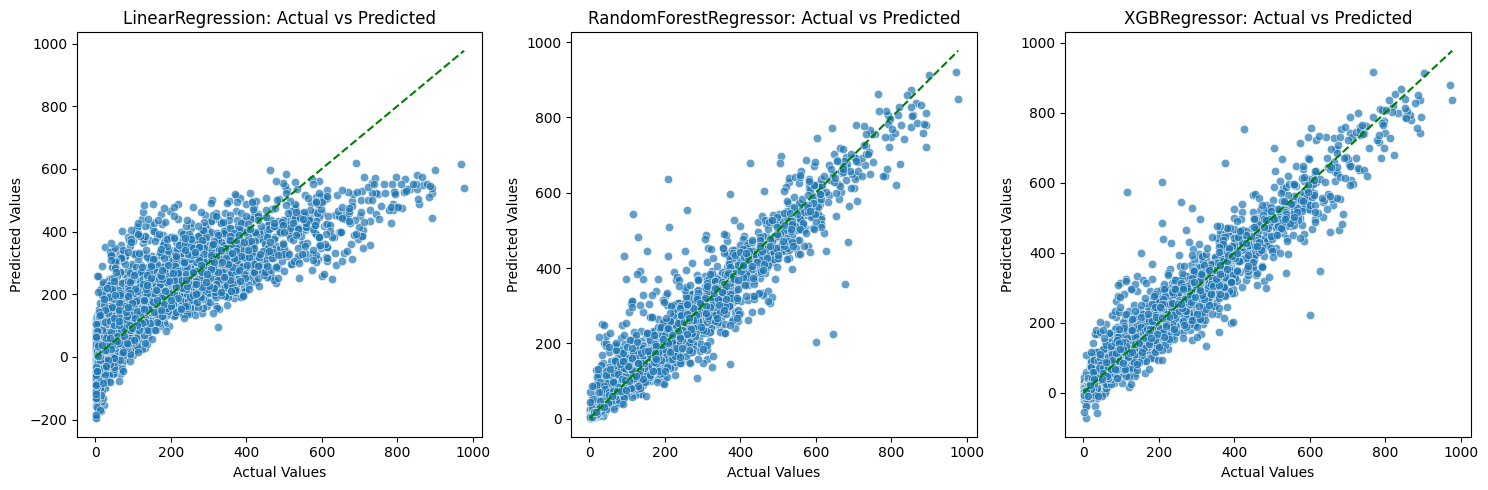

In [129]:
plt.figure(figsize=(15, 5))
for i, (name, predictions) in enumerate(train_results.items()):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(x=y_test, y=predictions, alpha=0.7, palette="viridis")
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="green", linestyle="--")
    plt.title(f"{name}: Actual vs Predicted")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")

plt.tight_layout()
plt.show()

Ці діаграми показують наскільки добре модель справляється з передбаченням в ідеальній моделі всі точки мали б бути розташовані вздовж лінії це б означало відсутність помилкових відповідей тут ми можемо бачити що дві моделі мають розташовані точки доволі близько до лінії проте все ж таки бувають дуже віддалені точки які свідчать про неідеальну ймовірність передбачення моделі ця діаграма лише підтвердила висновки з минулих показників де ми аналізували mse та r2 

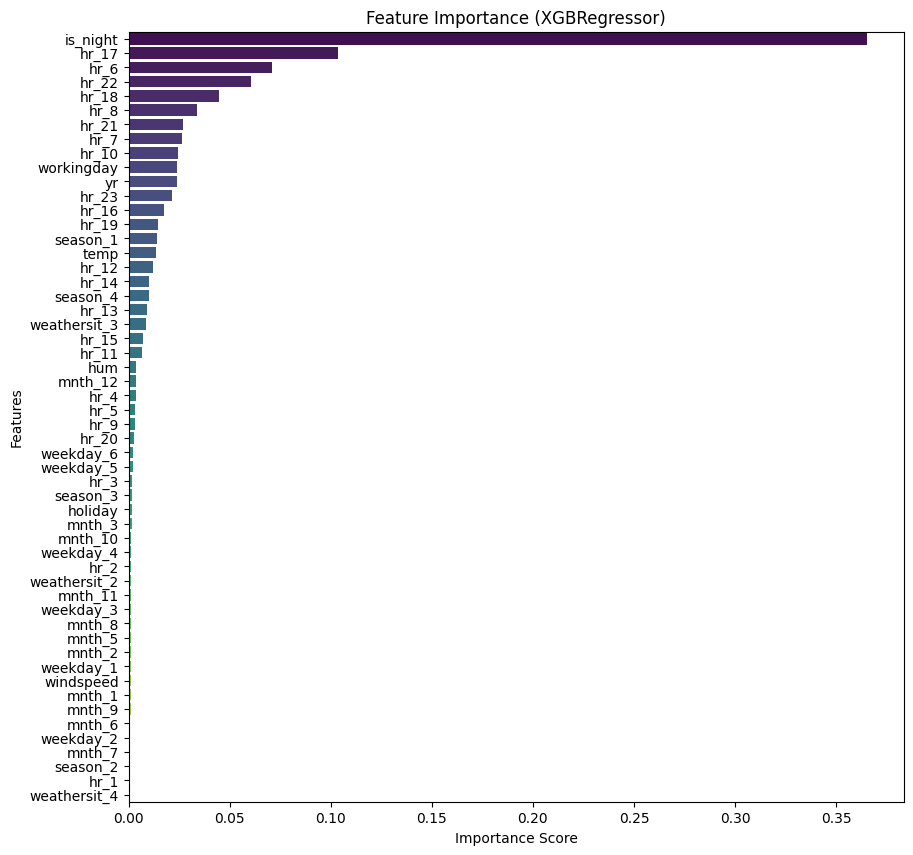

In [132]:
feature_importance = pd.Series(xgb_regressor_model.feature_importances_, index=features.drop("cnt", axis=1).columns).sort_values(ascending=False)

plt.figure(figsize=(10, 10))
sns.barplot(x=feature_importance, y=feature_importance.index, palette="viridis")
plt.title("Feature Importance (XGBRegressor)")
plt.xlabel("Importance Score")
plt.ylabel("Features")

plt.show()

Далі для аналізу які саме фічі найбільше впливають на модель я вирішив обрати `XGBRegressor`. З цієї діаграми можна побачити що на модель найбільше вплинула фіча `is_night` та також фічі які стосуються години де `hr_17` та `hr_6` займають друге та третє місце я вважаю це через те що ці години займають ключові ролі тому що переважно в такий час люди або їдуть на роботу або повертаються з неї

In [137]:
train_sizes, train_scores, test_scores = learning_curve(
    xgb_regressor_model, 
    features.drop("cnt", axis=1), 
    features["cnt"], 
    cv=5, scoring="r2", 
    train_sizes=np.linspace(0.1, 1.0, 10), 
    random_state=42
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

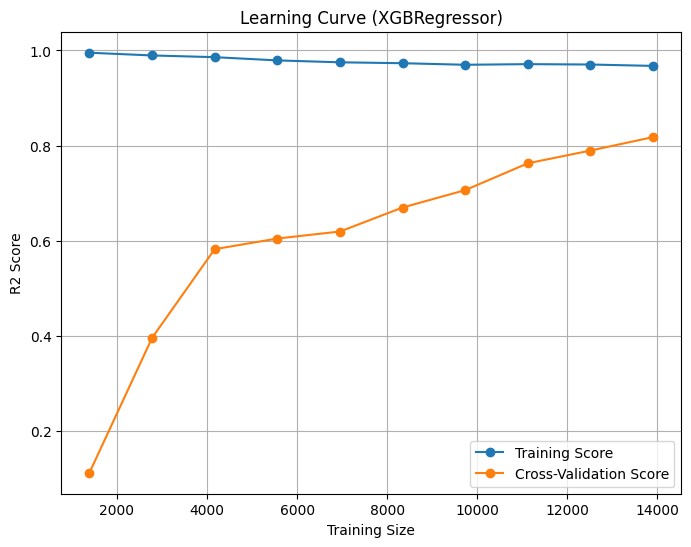

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label="Training Score", marker="o")
plt.plot(train_sizes, test_scores_mean, label="Cross-Validation Score", marker="o")
plt.title("Learning Curve (XGBRegressor)")
plt.xlabel("Training Size")
plt.ylabel("R2 Score")
plt.legend()
plt.grid()

plt.show()

За допомогою графіку Learning Curve ми можемо оцінити обсяги та ефективність навчання моделі та її продуктивність. Зараз можна сказати що розрив між показником навчання та валідації є невеликим що вказує на те що модель не перенавчена і навчання проходило поступово без різких відхилень та коливань згідно графіку валідації. Згідно цього ж графіку можу припустити що саме для цієї моделі є можливість досягнути ще кращих результатів передбачень підкоригувавши параметри моделі. Тому я вважаю що `XGBRegressor` є ідеальним вибором для цієї задачі.